## Final Project -  Group 17

# Sentimental Analysis Models for Twitter data

In [165]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import csv
import seaborn as sns 

In [166]:
df = pd.read_csv('Finaldata.csv')

In [167]:
df.head()

,tweets,clean_tweets,sentiment
0,Folks Iâ€™m at the Walmart bathroom and a woma...,folks walmart bathroom woman came turned janit...,positive
1,4/ Strategic acquirers up the wazoo. Every sin...,4 strategic acquirers wazoo every single ondem...,positive
2,@haddiebird Worse. Walmart. So ashamed.,worse walmart ashamed,positive
3,"@OfBrieMode Nothing wrong with Walmart, I blam...",nothing wrong walmart blame entirely shes whol...,negative
4,@JohnFusco12 Look what I found at Walmart! Th...,look found walmart checkout lady high praise w...,positive


## Cleaning using natural language tool kit

In [168]:
# Clean the text by removing any extra characters 
import re # tools for cleaning text
import nltk # library to perform NLP
nltk.download('stopwords') # tool to remove the non-essential words. It is a list of words
from nltk.corpus import stopwords
# Stemming means taking the root of the word such as love from loved or loving
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\abler\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [169]:
# Steps for cleaning the first review and apply for loop on all the reviews
df['clean_tweets'][0]
review = re.sub('[^a-zA-Z]', ' ', df['clean_tweets'][0]) # only keep the letters so what we dont want to remove
review = review.lower() # make all letters as lowercase 
review = review.split()  # split the review into separate words to create a list of words
ps =PorterStemmer()
review = [ps.stem(word) for word in review if not  word in set(stopwords.words('english'))] # use set for larger text
review = ' '.join(review) # take the list of words back into the string

In [170]:
review


'folk walmart bathroom woman came turn janitor clean toilet said'

In [171]:
corpus = [] # Build a new list for all the words from all the reviews

df['clean_tweets']=df['clean_tweets'].apply(str)
# corpus is a collection of text and a common term used in NLP
for i in range (0, 446):
    review = re.sub('[^a-zA-Z]', ' ', df['clean_tweets'][i] )
    review = review.lower()
    review = review.split()
    ps =PorterStemmer()
    review = [ps.stem(word) for word in review if not  word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)

In [172]:
corpus

['folk walmart bathroom woman came turn janitor clean toilet said',
 'strateg acquir wazoo everi singl ondemand food player tri acquir shef doordash ubereat',
 'wors walmart asham',
 'noth wrong walmart blame entir she whole dummi',
 'look found walmart checkout ladi high prais well granddaught',
 'walmart sell weav got kinki ponytail',
 'write two week break give today walmart',
 'alguien comprado millon btc rumor walmart confirma vamo k',
 'yall usual great pickup today pretti bad ive wait min',
 'hope britishcolumbia hurri allow costco walmart open campsit line',
 'lmao ayo walmart app updat shi look cool',
 'shouldv gotten went walmart',
 'best bang buck',
 'look found think',
 'new avail walmart west branch supercent cook rd west branch access apr pm',
 'go walmart time week ridicul atp',
 'walmart',
 'got walmart get niec last birthday present tomorrow ye',
 'bad walmart doesnt sell tcg merch',
 'idk what like like stay east nearest organ food store',
 'someon explain perfectli o

## Feature extraction

## Bag of words

In [173]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features= 300)

In [174]:
X = cv.fit_transform(corpus).toarray()

In [175]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [176]:
print(cv.get_feature_names())

['abl', 'absolut', 'access', 'air', 'airpod', 'alterc', 'although', 'alway', 'amazon', 'amp', 'anim', 'anoth', 'anytim', 'appoint', 'apr', 'around', 'ass', 'assault', 'avail', 'back', 'bad', 'bank', 'bc', 'best', 'bet', 'better', 'big', 'black', 'boat', 'book', 'bought', 'bring', 'bro', 'burnsvil', 'busi', 'buy', 'call', 'came', 'camera', 'cant', 'card', 'cart', 'cheap', 'check', 'chegou', 'classic', 'close', 'cloth', 'code', 'come', 'compani', 'comprei', 'continu', 'copi', 'costco', 'could', 'coupon', 'covid', 'custom', 'day', 'deal', 'death', 'definit', 'deliv', 'deliveri', 'depart', 'didnt', 'disgust', 'dont', 'drop', 'emerg', 'entain', 'entir', 'even', 'ever', 'everi', 'experi', 'feder', 'fight', 'find', 'first', 'follow', 'food', 'found', 'freshco', 'friday', 'fuck', 'game', 'get', 'girl', 'glad', 'go', 'gone', 'good', 'got', 'great', 'groceri', 'group', 'grove', 'grow', 'gt', 'guard', 'guess', 'gun', 'guy', 'half', 'happi', 'he', 'hear', 'help', 'high', 'hill', 'hit', 'hole', 'ho

In [177]:
X.shape

(446, 300)

In [178]:
y = df.iloc[:,-1].values

## Classification models

## Naive Bayes model

In [179]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.2, random_state=853) 

In [180]:
from sklearn.naive_bayes import GaussianNB
nv = GaussianNB() # create a classifier
nv.fit(X_train,y_train) # fitting the data

GaussianNB()

In [181]:
from sklearn.metrics import accuracy_score,confusion_matrix
y_pred = nv.predict(X_test) # store the prediction data
accuracy_score(y_test,y_pred) # calculate the accuracy

0.6555555555555556

In [182]:
from sklearn import metrics
con_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix is : {}".format(con_mat))

Confusion Matrix is : [[14  8]
 [23 45]]


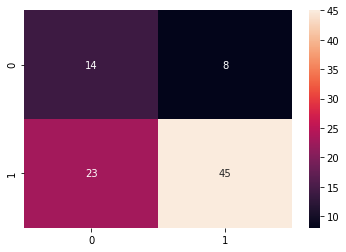

In [183]:
sns.heatmap(con_mat, annot=True)
plt.show()

## SVM

In [184]:
from sklearn.svm import SVC
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=853)

In [185]:
 # Building a classification model for linear SVM after scaling
from sklearn.svm import SVC
clf_svm = SVC(kernel='linear',C=2)
clf_svm.fit(X_train, y_train)
y_pred = clf_svm.predict(X_test)
# Making the Confusion Matrix
con_mat = confusion_matrix(y_test,y_pred)
# Evaluating the results
print("Confusion Matrix is : {}".format(con_mat))

Confusion Matrix is : [[14  8]
 [ 7 61]]


In [186]:
# Accuracy of the linear SVM
# calculate the accuracy of the Linear SVM on the training data
train_accuracies_m = []
test_accuracies_m = []
acc_train = clf_svm.score(X_train, y_train)
# calculate the accuracy of the Linear SVM on the test data
acc_test = clf_svm.score(X_test, y_test)
print(f'Train accuracy is {acc_train:.2f} and test accuracy is {acc_test:.2f}\n')
train_accuracies_m.append(acc_train)
test_accuracies_m.append(acc_test)

Train accuracy is 0.99 and test accuracy is 0.83



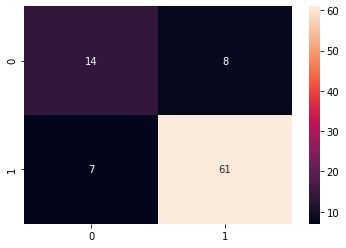

In [187]:
sns.heatmap(con_mat, annot=True)
plt.show()

## Decision tree

In [188]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 853)

# Building a classification model for Decision tree Classifier
from sklearn.tree import DecisionTreeClassifier
clf_dt = DecisionTreeClassifier()
clf_dt.fit(X_train,y_train)
y_pred = clf_dt.predict(X_test)

# Making the Confusion Matrix
con_mat = confusion_matrix(y_test,y_pred)

# Evaluating the results
print("Confusion Matrix is : {}".format(con_mat))

Confusion Matrix is : [[16  6]
 [ 8 60]]


In [189]:
#Calculating the accuracies for the decision tree
# calculate the accuracy of the Decision tree with no parameters on the training data
acc_train = clf_dt.score(X_train, y_train)
# calculate the accuracy of the Decision tree with no parameters on the test data
acc_test = clf_dt.score(X_test, y_test)
print(f'Train accuracy is {acc_train:.2f} and test accuracy is {acc_test:.2f}\n')
# Adding the train and test accuracies to the lists so we can plot them later
train_accuracies_m.append(acc_train)
test_accuracies_m.append(acc_test)

Train accuracy is 0.99 and test accuracy is 0.84



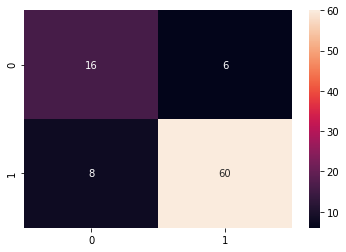

In [190]:
sns.heatmap(con_mat, annot=True)
plt.show()

### Random forest

In [191]:
for i in range(5, 12, 2):
    from sklearn.ensemble import RandomForestClassifier
    clf=RandomForestClassifier(n_estimators=i)
    clf.fit(X_train,y_train)

In [192]:
# Fitting classifier to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 853)
classifier.fit(X_train, y_train)
y_predict =classifier.predict(X_test)# Predicting the Test set results
con_mat = confusion_matrix(y_test,y_predict)
# Evaluating the results
print("Confusion Matrix is : {}".format(con_mat))

Confusion Matrix is : [[14  8]
 [ 6 62]]


In [193]:
print("Accuracy Score is : {}".format(accuracy_score(y_test, y_predict)))

Accuracy Score is : 0.8444444444444444


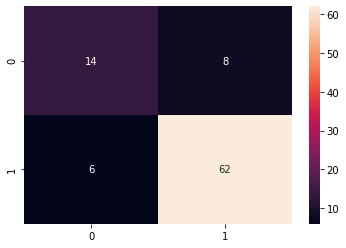

In [194]:
sns.heatmap(con_mat, annot=True)
plt.show()

## TF-IDF

In [195]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer (max_features=300, min_df=7, max_df=0.8, stop_words=stopwords.words('english'))

In [196]:
corpus = vectorizer.fit_transform(corpus).toarray()

In [197]:
X =corpus

## Naive bayes

In [198]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=853) #Split the dataset

In [199]:
from sklearn.naive_bayes import GaussianNB
nv = GaussianNB() # create a classifier
nv.fit(X_train,y_train) # fitting the data

GaussianNB()

In [200]:
from sklearn.metrics import accuracy_score,confusion_matrix
y_pred = nv.predict(X_test) # store the prediction data
accuracy_score(y_test,y_pred) # calculate the accuracy

0.4222222222222222

In [201]:
con_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix is : {}".format(con_mat))

Confusion Matrix is : [[19  3]
 [49 19]]


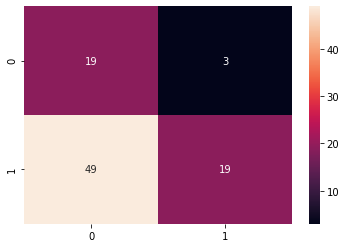

In [203]:
sns.heatmap(con_mat, annot=True)
plt.show()

## Random Forest

In [204]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 853)
#Implementing the Random forest
for i in range(5, 12, 2):
    from sklearn.ensemble import RandomForestClassifier
    clf=RandomForestClassifier(n_estimators=i)
    clf.fit(X_train,y_train)

In [205]:
# Fitting classifier to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 853)
classifier.fit(X_train, y_train)
y_predict =classifier.predict(X_test)# Predicting the Test set results
con_mat = confusion_matrix(y_test,y_predict)
# Evaluating the results
print("Confusion Matrix is : {}".format(con_mat))


Confusion Matrix is : [[13  9]
 [ 6 62]]


In [206]:
print("Accuracy Score is : {}".format(accuracy_score(y_test, y_predict)))

Accuracy Score is : 0.8333333333333334


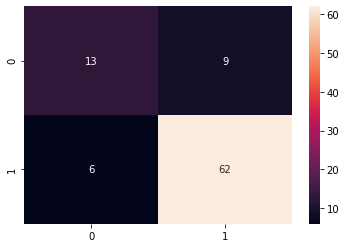

In [207]:
sns.heatmap(con_mat, annot=True)
plt.show()

## Decision tree

In [208]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 853)
# Building a classification model for Decision tree Classifier
from sklearn.tree import DecisionTreeClassifier
clf_dt = DecisionTreeClassifier()
clf_dt.fit(X_train,y_train)
y_pred = clf_dt.predict(X_test)
# Making the Confusion Matrix
con_mat = confusion_matrix(y_test,y_pred)
# Evaluating the results
print("Confusion Matrix is : {}".format(con_mat))

Confusion Matrix is : [[13  9]
 [ 3 65]]


In [209]:
#Calculating the accuracies for the decision tree
# calculate the accuracy of the Decision tree with no parameters on the training data
acc_train = clf_dt.score(X_train, y_train)
# calculate the accuracy of the Decision tree with no parameters on the test data
acc_test = clf_dt.score(X_test, y_test)
print(f'Train accuracy is {acc_train:.2f} and test accuracy is {acc_test:.2f}\n')
# Adding the train and test accuracies to the lists so we can plot them later
train_accuracies_m.append(acc_train)
test_accuracies_m.append(acc_test)


Train accuracy is 0.94 and test accuracy is 0.87



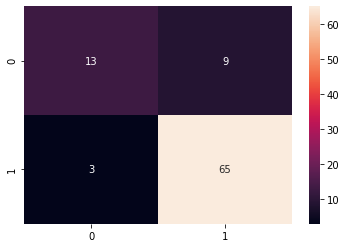

In [210]:
sns.heatmap(con_mat, annot=True)
plt.show()

## SVM

In [211]:
from sklearn.svm import SVC
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=853) #Split the dataset

In [212]:
 # Building a classification model for linear SVM after scaling
from sklearn.svm import SVC
clf_svm = SVC(kernel='linear',C=2)
clf_svm.fit(X_train, y_train)
y_pred = clf_svm.predict(X_test)
# Making the Confusion Matrix
con_mat = confusion_matrix(y_test,y_pred)
# Evaluating the results
print("Confusion Matrix is : {}".format(con_mat))

Confusion Matrix is : [[10 12]
 [ 5 63]]


In [213]:
# Accuracy of the linear SVM
# calculate the accuracy of the Linear SVM on the training data
train_accuracies_m = []
test_accuracies_m = []
acc_train = clf_svm.score(X_train, y_train)
# calculate the accuracy of the Linear SVM on the test data
acc_test = clf_svm.score(X_test, y_test)
print(f'Train accuracy is {acc_train:.2f} and test accuracy is {acc_test:.2f}\n')
train_accuracies_m.append(acc_train)
test_accuracies_m.append(acc_test)

Train accuracy is 0.86 and test accuracy is 0.81



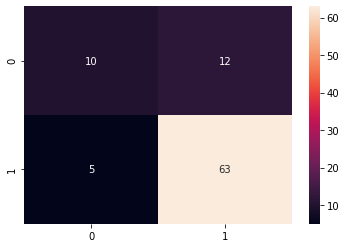

In [214]:
sns.heatmap(con_mat, annot=True)
plt.show()